In [1]:
import pandas as pd 
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
airlines = pd.read_csv("C:/Users/Hp/Documents/csv/Airlines.csv")
airlines



,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


<AxesSubplot:>

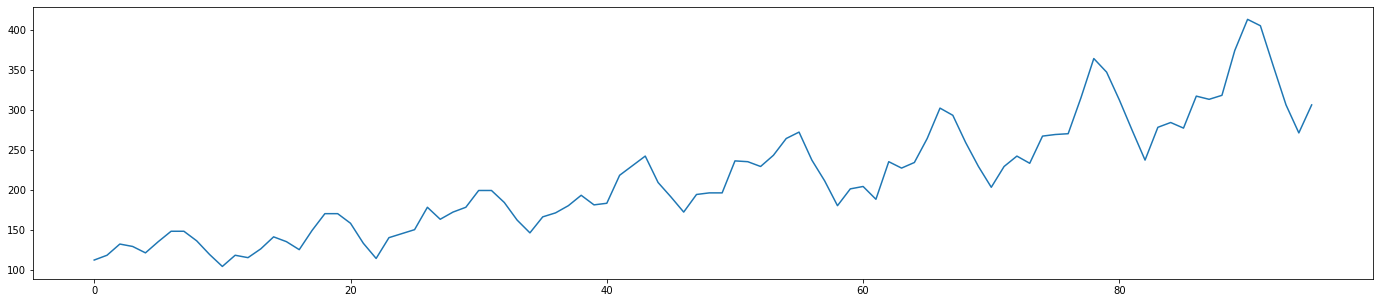

In [3]:
fig = plt.figure(figsize=(24,5))
airlines.Passengers.plot()

In [4]:
airlines['Date'] = pd.to_datetime(airlines.Month,format = "%b-%y")
airlines["Months"] = airlines.Date.dt.strftime("%b")
airlines["Year"] = airlines.Date.dt.strftime("%Y")

#t,t_sqr,log_pass
airlines['t'] = np.arange(1,97)
airlines["t_sqr"] = airlines["t"]*airlines["t"]
airlines['log_pas'] = np.log(airlines['Passengers'])

#creating dummies
month_dummies = pd.DataFrame(pd.get_dummies(airlines['Months']))
airlines = pd.concat([airlines,month_dummies],axis = 1)

In [5]:
airlines

,Month,Passengers,Date,Months,Year,t,t_sqr,log_pas,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,Sep-02,355,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,Oct-02,306,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,Nov-02,271,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
m = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
j = 8
for i in m:
    col = airlines.pop(i)
    airlines.insert(j,i,col)
    j+=1
airlines    


,Month,Passengers,Date,Months,Year,t,t_sqr,log_pas,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,Sep-02,355,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,Oct-02,306,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,Nov-02,271,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


(<AxesSubplot:xlabel='Months', ylabel='Year'>,)

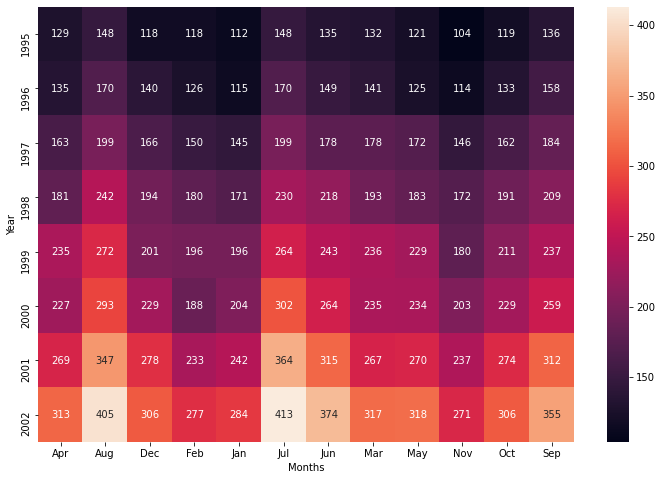

In [7]:
#heatmap
plt.figure(figsize=(12,8))
heatmap_airlines = pd.pivot_table(data=airlines,values = 'Passengers',index ='Year', columns ='Months',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_airlines,annot = True, fmt = 'g'),

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

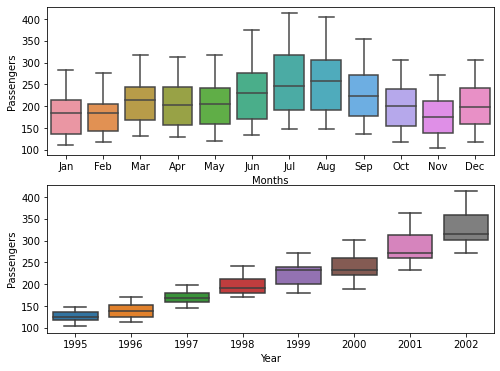

In [8]:
#boxplot
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x='Months',y= 'Passengers',data= airlines)
plt.subplot(212)
sns.boxplot(x='Year',y= 'Passengers',data= airlines)

<AxesSubplot:>

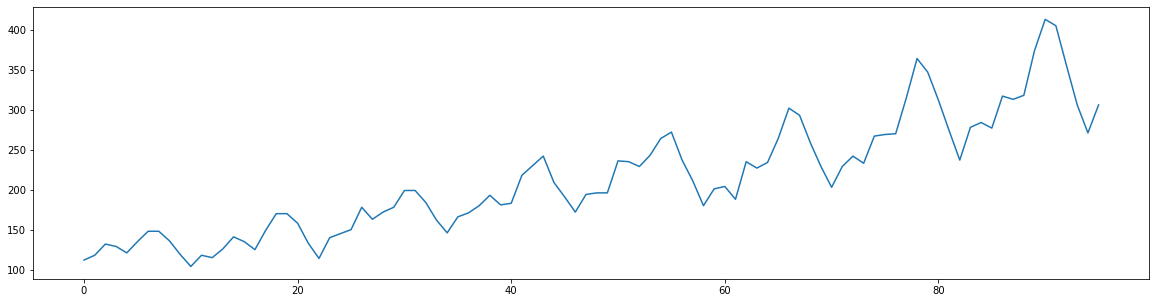

In [9]:
fig = plt.figure(figsize=(20,5))
airlines.Passengers.plot()

<ipython-input-10-72645bbcc4b6>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_airlines = seasonal_decompose(airlines.Passengers, freq=12)


<Figure size 1080x864 with 0 Axes>

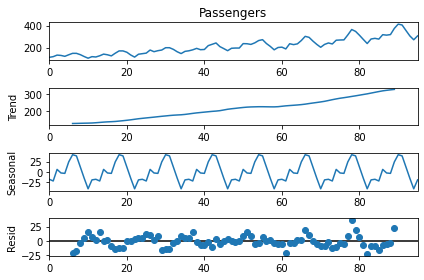

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition plot
plt.figure(figsize=(15,12))
decompose_airlines = seasonal_decompose(airlines.Passengers, freq=12)
decompose_airlines.plot()
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

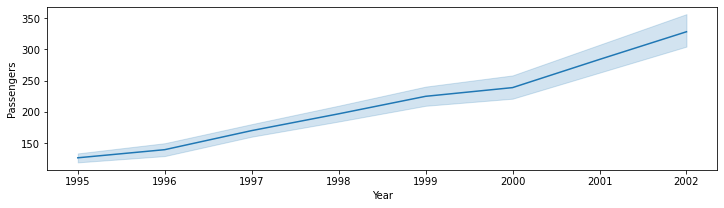

In [11]:
#lineplot
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airlines)

In [12]:
#splitting data
train = airlines.head(83)
test = airlines.tail(12)

In [13]:
def rmse_value(test,pred):
    x =np.sqrt(np.mean((np.array(test)-np.array(pred))**2))
    return x

In [14]:
#Linear model

import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=train).fit()
linear_pred = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = rmse_value(test['Passengers'],linear_pred)
#rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(linear_pred))**2))
rmse_linear

52.961479288085215

In [15]:
#Exponential model
exp_model = smf.ols('log_pas~t',data=train).fit()
exp_pred = pd.Series(exp_model.predict(test['t']))
rmse_exp = rmse_value(test['Passengers'],np.exp(exp_pred))
#rmse_exp = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(exp_pred)))**2))
rmse_exp

45.91166269415976

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqr',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_sqr"]]))
#rmse_Quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad = rmse_value(test['Passengers'],(pred_Quad))
rmse_Quad

47.31340324865592

In [17]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
#rmse_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea = rmse_value(test['Passengers'],(pred_add_sea))
rmse_add_sea

133.96289577789926

In [18]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_Quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_sqr']]))
#rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_Quad = rmse_value(test['Passengers'],(pred_add_sea_Quad))
rmse_add_sea_Quad

26.545974140658377

In [19]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_pas~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
#rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea = rmse_value(test['Passengers'],(np.exp(pred_Mult_sea)))
rmse_Mult_sea

141.01026820003779

In [20]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
#rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea = rmse_value(test['Passengers'],(np.exp(pred_Mult_add_sea)))
rmse_Mult_add_sea

10.560059061397189

In [21]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_Quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.560059
4,rmse_add_sea_quad,26.545974
1,rmse_Exp,45.911663
2,rmse_Quad,47.313403
0,rmse_linear,52.961479
3,rmse_add_sea,133.962896
5,rmse_Mult_sea,141.010268


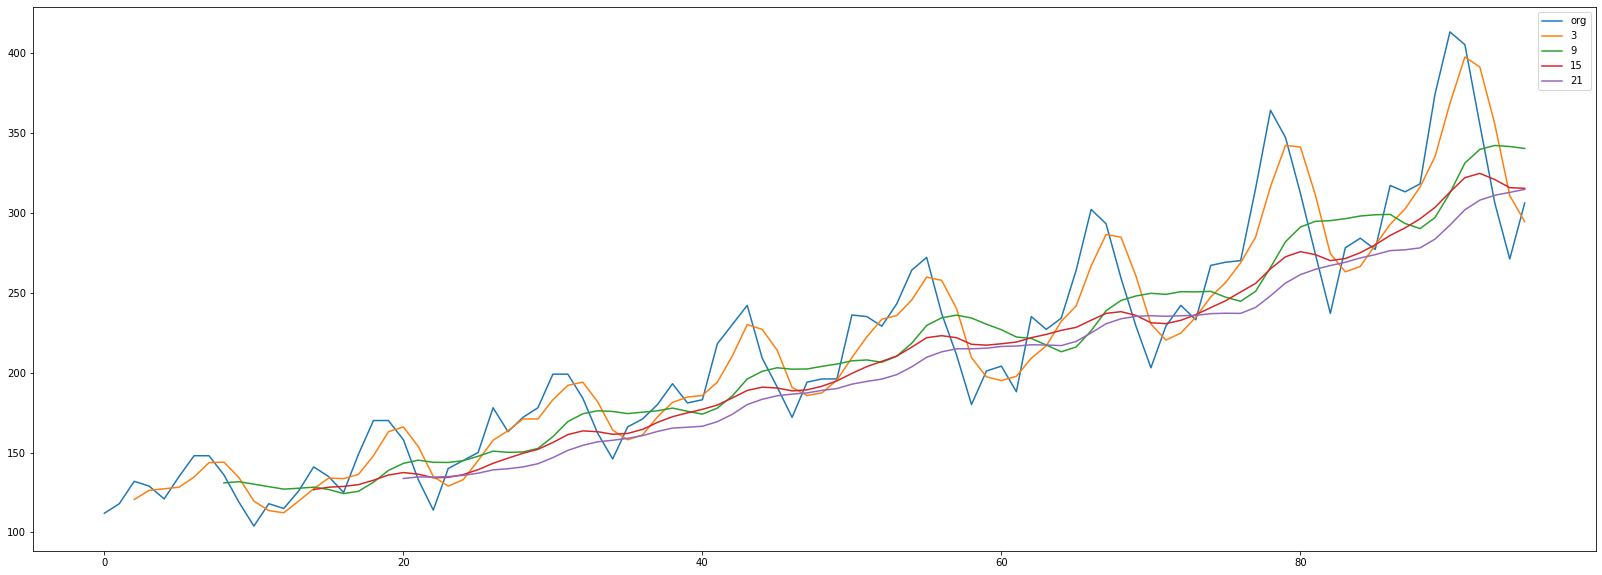

In [22]:
#moving Avg

plt.figure(figsize=(28,10))
airlines['Passengers'].plot(label = 'org')
for i in range(3,24,6):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc = 'best')

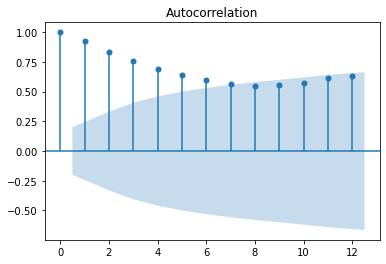

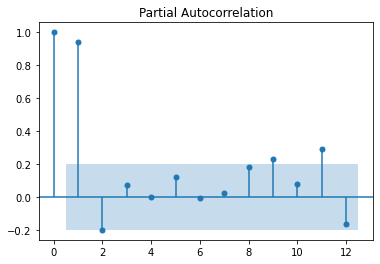

In [23]:
#ACF an PACF

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags = 12)
tsa_plots.plot_pacf(airlines.Passengers,lags = 12)
plt.show()



In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [25]:
#MAPE

#def MAPE(pred,org):
    #temp = np.abs((pred-org)/org)*100
    #return np.mean(temp)

In [26]:
#RMSE

def rmse_value(test,pred):
    x =np.sqrt(np.mean((np.array(test)-np.array(pred))**2))
    return x

In [27]:
#simple exp method

ses_model = SimpleExpSmoothing(train.Passengers.astype('double')).fit(smoothing_level=1)
pred_ses = np.array(ses_model.predict(start = test.index[0],end= test.index[-1]))
#mape_ses=MAPE(pred_ses,np.array(test.Passengers))
rmse_ses = rmse_value(pred_ses,test.Passengers)
rmse_ses

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


102.10982649415611

In [28]:
#Holt method

hw_model = Holt(train['Passengers'].astype('double')).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_hw = np.array(hw_model.predict(start = test.index[0],end= test.index[-1]))
#mape_hw=MAPE(pred_hw,np.array(test.Passengers))
rmse_hw = rmse_value(pred_hw,test.Passengers)
rmse_hw

<ipython-input-28-92ad0fddc19b>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train['Passengers'].astype('double')).fit(smoothing_level=0.8,smoothing_slope=0.2)


171.97050715251288

In [29]:
#Holts winter exponential smoothing with additive seasonality and additive trends

hw_a_a_model = ExponentialSmoothing(train['Passengers'].astype('double'),seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hw_a_a = hw_a_a_model.predict(start = test.index[0],end= test.index[-1])
#mape_hw_a_a=MAPE(pred_hw_a_a,test['Passengers'])
rmse_hw_a_a = rmse_value(pred_hw_a_a,test.Passengers)
rmse_hw_a_a

13.526679070714302

In [30]:
hw_m_a_model = ExponentialSmoothing(train['Passengers'].astype('double'),seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hw_m_a = hw_m_a_model.predict(start = test.index[0],end= test.index[-1])
#mape_hw_m_a=MAPE(pred_hw_m_a,test['Passengers'])
rmse_hw_m_a = rmse_value(pred_hw_m_a,test['Passengers'])
rmse_hw_m_a

18.10864459032843

In [31]:
data = {'model':pd.Series(['ses_model','hw_model','hw_a_a_model','hw_m_a_model']),'RMSE_values':pd.Series([rmse_ses,rmse_hw,rmse_hw_a_a,rmse_hw_m_a])}
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_values'])

,model,RMSE_values
2,hw_a_a_model,13.526679
3,hw_m_a_model,18.108645
0,ses_model,102.109826
1,hw_model,171.970507


In [32]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [33]:
airlines_copy =airlines.copy()
airlines_copy =airlines_copy.drop('Month',axis=1)
airlines_copy

,Passengers,Date,Months,Year,t,t_sqr,log_pas,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,112,1995-01-01,Jan,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,118,1995-02-01,Feb,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,129,1995-04-01,Apr,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,2002-08-01,Aug,2002,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,355,2002-09-01,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,306,2002-10-01,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,271,2002-11-01,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


In [34]:
train2 = airlines.Passengers[0:83]
test2 = airlines.Passengers[83:]

In [35]:
arima_model = ARIMA(train2,order=(2,1,2)).fit(disp=0)
pred_arima=arima_model.forecast(13)[0]
rmse_arima = sqrt(mean_squared_error(test2,pred_arima))
rmse_arima

C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-pa

43.61881260386745

In [36]:
#from the above model evaluations the "#Multiplicative Additive Seasonality" has the lowest RMSE value


In [37]:
airlines.head(10)

,Month,Passengers,Date,Months,Year,t,t_sqr,log_pas,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-95,112,1995-01-01,Jan,1995,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,1995-02-01,Feb,1995,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-95,129,1995-04-01,Apr,1995,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,May-95,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
5,Jun-95,135,1995-06-01,Jun,1995,6,36,4.905275,0,0,0,0,0,1,0,0,0,0,0,0
6,Jul-95,148,1995-07-01,Jul,1995,7,49,4.997212,0,0,0,0,0,0,1,0,0,0,0,0
7,Aug-95,148,1995-08-01,Aug,1995,8,64,4.997212,0,0,0,0,0,0,0,1,0,0,0,0
8,Sep-95,136,1995-09-01,Sep,1995,9,81,4.912655,0,0,0,0,0,0,0,0,1,0,0,0
9,Oct-95,119,1995-10-01,Oct,1995,10,100,4.779123,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
final_model = smf.ols('log_pas~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = airlines).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_pas   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     396.6
Date:                Fri, 07 May 2021   Prob (F-statistic):           6.90e-68
Time:                        10:51:07   Log-Likelihood:                 164.35
No. Observations:                  96   AIC:                            -302.7
Df Residuals:                      83   BIC:                            -269.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3983      0.009    490.162      0.000       4.380       4.416
t              0.0112      0.000     64.390      0.000       0.011       0.012
Jan            0.2834      0.016     17.818      0.000       0.252       0.315
Feb            0.2827      0.016     17.777      0.000       0.251       0.314
Mar            0.4147      0.016     26.074      0.000       0.383       0.446
Apr            0.3706      0.016     23.300      0.000       0.339       0.402
May            0.3529      0.016     22.180      0.000       0.321       0.385
Jun            0.4655      0.016     29.249      0.000       0.434       0.497
Jul            0.5605      0.016     35.204      0.000       0.529       0.592
Aug            0.5472      0.016     34.347      0.000       0.515       0.579
Sep            0.4257      0.016     26.704      0.000       0.394       0.457
Oct            0.2844      0.016     17.823      0.000       0.253       0.316
Nov            0.1427      0.016      8.935      0.000       0.111       0.174
Dec            0.2680      0.016     16.765      0.000       0.236       0.300
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.075
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.435   Cond. No.                     6.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
final_model_pred = pd.Series(final_model.predict(airlines))
final_model_pred

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64